## Airbnb, NYC Case Study
#### Objective:
Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -
* Which type of hosts to acquire more and where?
* The categorisation of customers based on their preferences.
     - What are the neighbourhoods they need to target?
     - What is the pricing ranges preferred by customers?
     - The various kinds of properties that exist w.r.t. customer preferences.
     - Adjustments in the existing properties to make it more customer-oriented.
* What are the most popular localities and properties in New York currently?
* How to get unpopular properties more traction?

#### Presentation - I
- Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
- Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.

#### Presentation - II
- Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
- Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

In [124]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# importing warnings

import warnings
warnings.filterwarnings('ignore')

In [126]:
# Reading the dataset

airbnb_df = pd.read_csv("AB_NYC_2019.csv")
airbnb_df.head()              # Checking the head of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [127]:
# Checking the shape of the dataframe

airbnb_df.shape

(48895, 16)

- Dataset has 48,895 rows and 16 columns

In [128]:
# Checking the overview of the dataset

airbnb_df.info()

# We could see that there are 16 columns. Presence of missing values could be seen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [129]:
# Checking the statistical summary of the dataset

airbnb_df.describe([0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
60%,2.250310e+07,4.868555e+07,40.738420,-73.948890,130.000000,3.000000,9.000000,1.060000,1.000000,92.000000
70%,2.714074e+07,8.082452e+07,40.756030,-73.941290,155.000000,4.000000,17.000000,1.690000,2.000000,179.000000
80%,3.053027e+07,1.371296e+08,40.770982,-73.927698,200.000000,6.000000,33.000000,2.470000,3.000000,272.000000
90%,3.399094e+07,2.128114e+08,40.804890,-73.907810,269.000000,28.000000,70.000000,3.630000,5.000000,337.000000
95%,3.525910e+07,2.417646e+08,40.825643,-73.865771,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000


In [130]:
# Checking the missing values in the dataset

airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Columns: name, host_name are categorical columns with all unique records. Hence, we could not replace missing values with mode.

In [131]:
airbnb_df[ airbnb_df['reviews_per_month'].isna()].head()

#Upon checking, missing values in reviews_per_month column is associated with number_of_reviews column. Properties which has not received any reviews has been filled as NaN in reviews per month.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [132]:
#Replacing missing values in reviews_per_month with 0

airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [133]:
#last_review column does not add any value to analysis. Hence, dropping the column

airbnb_df.drop(['last_review'],axis=1,inplace=True)

In [134]:
#Checking the missing values

airbnb_df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

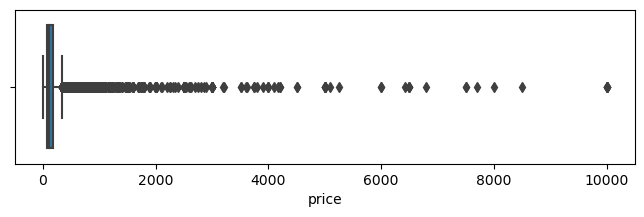

In [135]:
# Checking for outliers

plt.figure(figsize=[8,2])
sns.boxplot(data = airbnb_df, x = "price")
plt.show()

Spread of prices could be justified with varying amount of rates fixed by the stay places

In [136]:
#checking the distribution of neighbourhood

airbnb_df['neighbourhood'].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

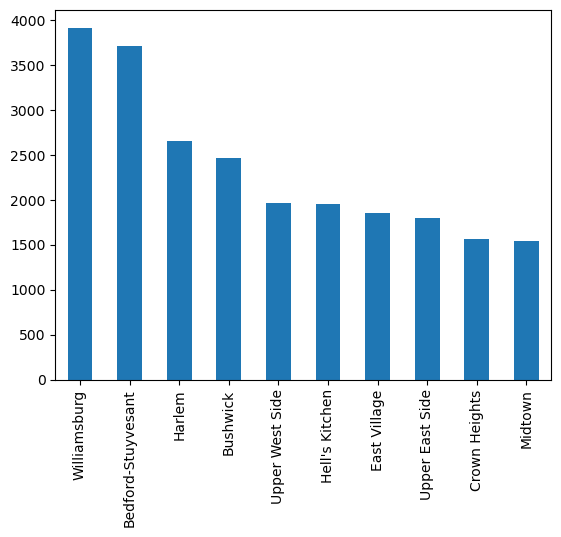

In [137]:
#visualizing the top 10 neighbourhood

airbnb_df['neighbourhood'].value_counts()[:10].plot.bar()
plt.show()

In [138]:
# Checking the distribution of neighbourhood_group

neigh_dist = (airbnb_df['neighbourhood_group'].value_counts(normalize=True))*100
neigh_dist

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

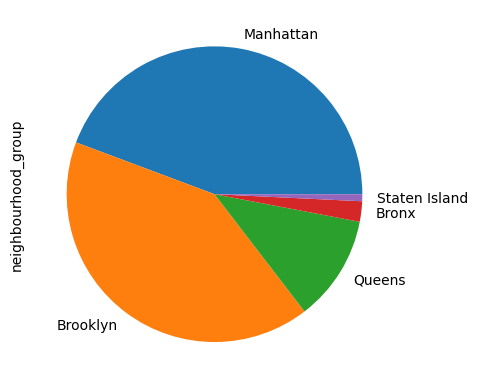

In [139]:
# Checking the percentage share of neighbourhood_group

neigh_dist.plot.pie()
plt.show()

In [140]:
# Checking the distribution of room types

airbnb_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

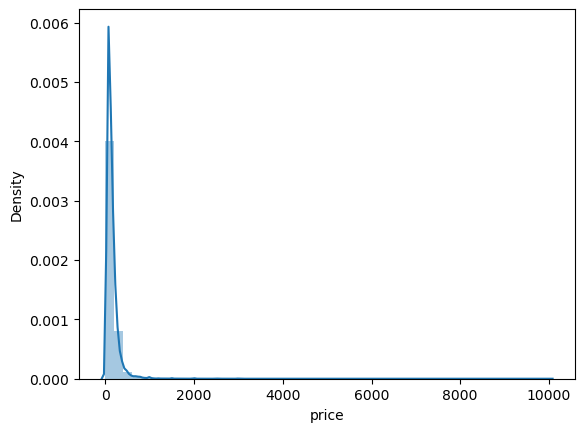

In [141]:
#checking the distribution of price

sns.distplot(airbnb_df['price'])
plt.show()

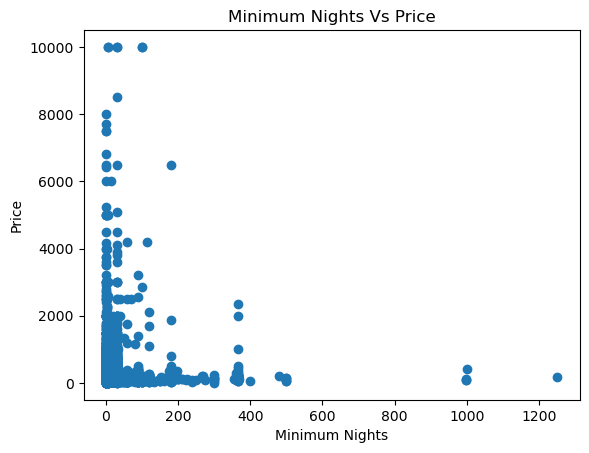

In [142]:
# Data distribution between minimum nights and price

plt.scatter(airbnb_df['minimum_nights'],airbnb_df['price'])
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.title("Minimum Nights Vs Price")
plt.show()

In [143]:
#Checking average price based on the neighbourhood_group

airbnb_df.groupby("neighbourhood_group")['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Average price of stay for Manhattan stands at 196 USD which is highest among the neighbourhood_group and Bronx stands at 87 USD which is the lowest.

In [144]:
#Checking the price of the stay based on the room types

airbnb_df.groupby("room_type")['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [145]:
# Created a column by binning the price column

airbnb_df['price_bin'] = pd.cut(x=airbnb_df['price'], bins=[0,50,100,200,300,500,700,1000,10000],labels=['<50','50-100','100-200','200-300','300-500','500-700','700-1000','1000-10000'])
airbnb_df[['price','price_bin']].head(10)

,price,price_bin
0,149,100-200
1,225,200-300
2,150,100-200
3,89,50-100
4,80,50-100
5,200,100-200
6,60,50-100
7,79,50-100
8,79,50-100
9,150,100-200


In [146]:
# Creating the distrition of price bin

airbnb_df['price_bin'].value_counts()

50-100        17367
100-200       16583
<50            6550
200-300        5027
300-500        2313
500-700         455
700-1000        350
1000-10000      239
Name: price_bin, dtype: int64

In [147]:
#Percentage share of properties based on price bins

airbnb_df['price_bin'].value_counts(normalize=True)*100

50-100        35.526962
100-200       33.923165
<50           13.399067
200-300       10.283528
300-500        4.731610
500-700        0.930775
700-1000       0.715981
1000-10000     0.488913
Name: price_bin, dtype: float64

Nearly 50% of properties are within the price less than 100 USD

In [150]:
airbnb_df['minimum_nights'].describe([0.3,0.5,0.7,0.9,0.95,0.99])

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
30%          2.000000
50%          3.000000
70%          4.000000
90%         28.000000
95%         30.000000
99%         45.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [152]:
#Binning the minimum nights

airbnb_df['min_nights_bins'] = pd.cut(x=airbnb_df['minimum_nights'], bins=[0,1,2,3,4,5,10,30,1000], labels=['1N','2Ns','3Ns','4Ns','5Ns','5-10Ns','10-30Ns','>30Ns'])
airbnb_df[['minimum_nights','min_nights_bins']].head(10)

,minimum_nights,min_nights_bins
0,1,1N
1,1,1N
2,3,3Ns
3,1,1N
4,10,5-10Ns
5,3,3Ns
6,45,>30Ns
7,2,2Ns
8,2,2Ns
9,1,1N


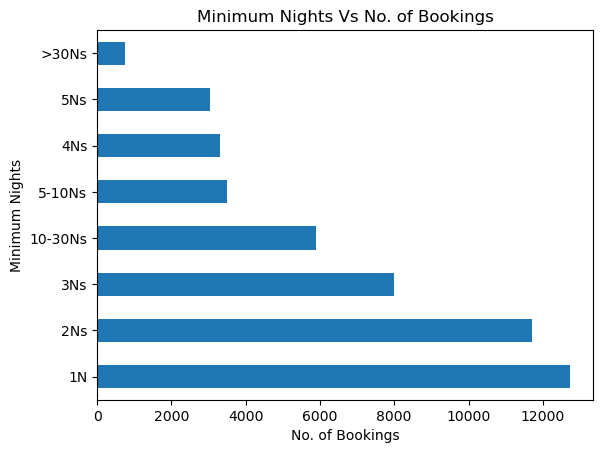

In [158]:
#Checking the minimum nights bins and bookings distribution

airbnb_df['min_nights_bins'].value_counts().plot.barh()
plt.title("Minimum Nights Vs No. of Bookings")
plt.xlabel("No. of Bookings")
plt.ylabel("Minimum Nights")
plt.show()

In [162]:
#Checking the updated dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_bin,min_nights_bins
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,100-200,1N
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,200-300,1N
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,100-200,3Ns
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,50-100,1N
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,50-100,5-10Ns


In [159]:
# Saving the updated dataframe to CSV

airbnb_df.to_csv(r'D:\Data Science\Airbnb, NYC Case Study\airbnb_data.csv', index=False, header=True)